In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv('./csvs/lab4.csv',encoding='cp1251')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               198 non-null    int64 
 1   gender           198 non-null    object
 2   age              198 non-null    int64 
 3   income           198 non-null    int64 
 4   spending_rating  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [97]:
variables = ['age', 'income', 'spending_rating']
x = df.loc[:, variables].values
y = df.loc[:,['gender']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
print(x)


            0         1         2
0   -1.424076 -1.798943 -0.422716
1   -1.279921 -1.798943  1.219183
2   -1.351999 -1.759745 -1.712779
3   -1.135767 -1.759745  1.062811
4   -0.559147 -1.720548 -0.383623
..        ...       ...       ...
193  0.594093  2.316830 -1.321851
194  0.449938  2.552017 -0.852737
195 -0.487069  2.552017  0.945533
196 -0.487069  2.983193 -1.243665
197 -0.631224  2.983193  1.297368

[198 rows x 3 columns]


In [98]:
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
print(x_pca)

            0         1         2
0   -0.636056 -1.806655  1.332032
1   -1.693911 -1.867253  0.069542
2    0.324541 -1.716548  2.192340
3   -1.483144 -1.819480  0.077549
4   -0.055512 -1.714284  0.691553
..        ...       ...       ...
193  1.261044  2.376292  0.480561
194  0.818420  2.590621  0.247520
195 -1.113995  2.504567 -0.360859
196  0.415104  3.019606  1.180273
197 -1.481606  2.919221 -0.513846

[198 rows x 3 columns]


In [99]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.43283775 0.33319535 0.2339669 ]
[16.03451356 14.06833462 11.7888225 ]


In [100]:
y_ = np.resize(y, 198)
x_pca.columns = ['PC1','PC2','PC3']
x_pca['gender'] = y_
print(x_pca.head())

        PC1       PC2       PC3  gender
0 -0.636056 -1.806655  1.332032    Male
1 -1.693911 -1.867253  0.069542    Male
2  0.324541 -1.716548  2.192340  Female
3 -1.483144 -1.819480  0.077549  Female
4 -0.055512 -1.714284  0.691553  Female


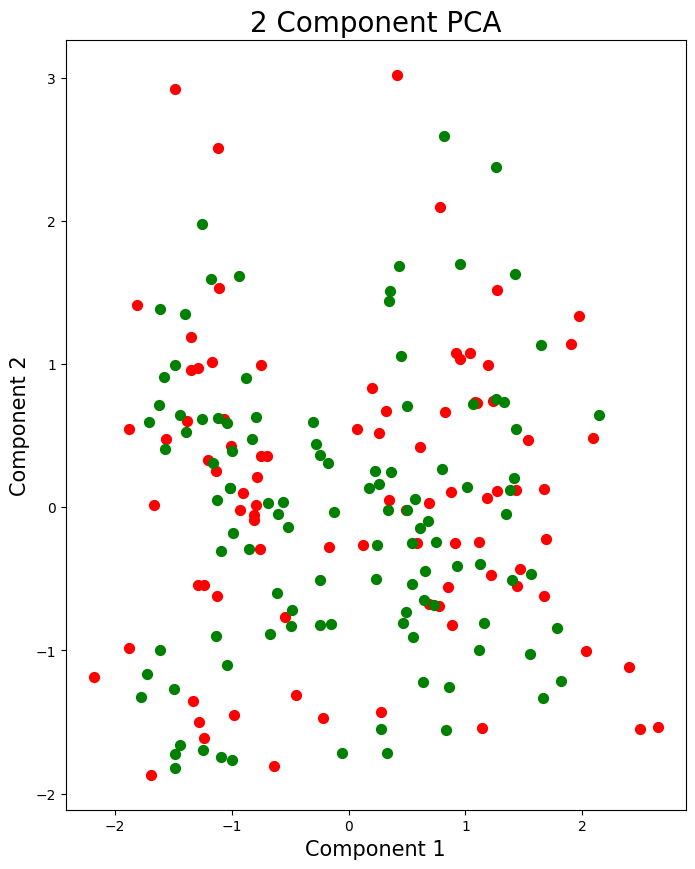

In [101]:
fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
gender = ['Male', 'Female']
colors = ['r', 'g']
for gender, color in zip(gender,colors):
    indicesToKeep= x_pca['gender'] == gender
    ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
               , x_pca.loc[indicesToKeep, 'PC2']
               , c = color, s = 50)
plt.show()

1. Стандартизировать данные методом MinMaxScaler;


In [102]:
from sklearn.preprocessing import MinMaxScaler
que_df = pd.read_csv('./csvs/lab4.csv',encoding='cp1251')
variables = ['age', 'income', 'spending_rating']
que_df[variables] = MinMaxScaler().fit_transform(que_df[variables])
que_df.head(10)

,id,gender,age,income,spending_rating
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959
5,6,Female,0.269231,0.016393,0.765306
6,7,Female,0.326923,0.393443,0.051020
7,8,Female,0.423077,0.024590,0.948980
8,9,Male,0.884615,0.032787,0.020408
9,10,Female,0.134615,0.032787,0.724490



2. Разделить данные на класс и признаки;

In [103]:
que_x = que_df.loc[:, variables].values
que_y = que_df.loc[:,['gender']].values


3. Провести понижение размерности методом главных компонент и 
методом факторного анализа;

In [104]:
from sklearn.decomposition import FactorAnalysis

que_pca = PCA(n_components=2)
que_fa = FactorAnalysis(n_components=2)

que_x_PCA = que_pca.fit_transform(que_x)
que_x_PCA = pd.DataFrame(que_x_PCA)
que_x_FA = que_fa.fit_transform(que_x)
que_x_FA = pd.DataFrame(que_x_FA)



4. Определить значение дисперсии;

In [105]:
# Вывод объясненной дисперсии каждой компоненты в PCA
print("Объясненные дисперсии каждой компоненты в PCA:", que_pca.explained_variance_ratio_)

# Вывод объясненной дисперсии каждой компоненты в Factor Analysis
explained_variance_fa = np.var(que_x, axis=0) - np.diag(que_fa.get_covariance())
explained_variance_ratio_fa = explained_variance_fa / np.var(que_x, axis=0)
print("Значения для доли объясненной дисперсии в Factor Analysis:", explained_variance_ratio_fa)


Объясненные дисперсии каждой компоненты в PCA: [0.49430654 0.26690895]
Значения для доли объясненной дисперсии в Factor Analysis: [-0.0026043  -0.00135925 -0.00253894]




5. Построить диаграмму рассеяния;

In [106]:
que_x_PCA.columns = ['PC1','PC2']
que_x_FA.columns = ['PC1','PC2']
que_x_PCA['gender'] = y_
que_x_FA['gender'] = y_


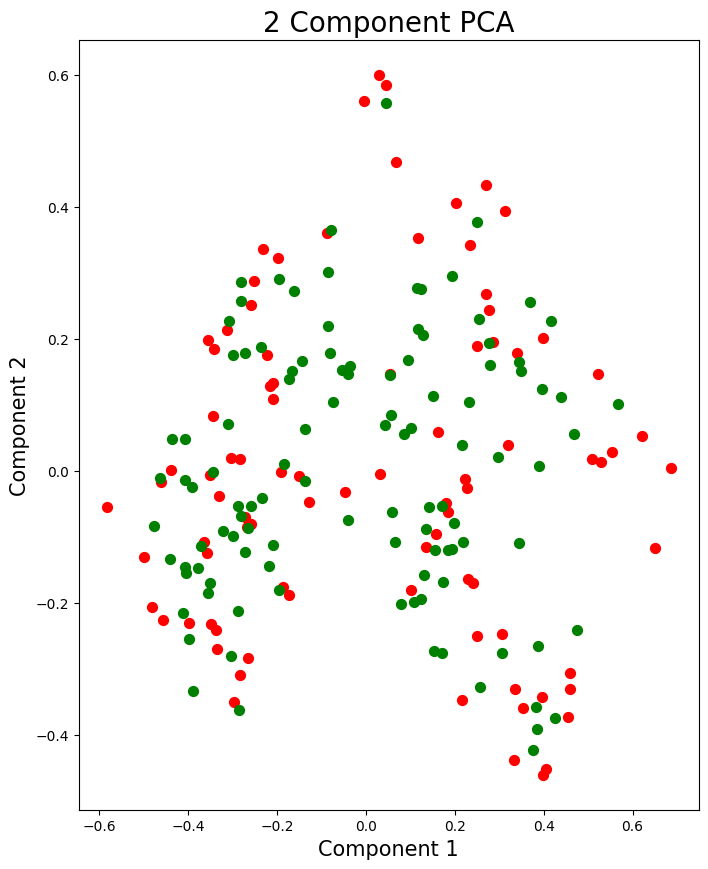

In [107]:
fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
gender = ['Male', 'Female']
colors = ['r', 'g']
for gender, color in zip(gender,colors):
    indicesToKeep= que_x_PCA['gender'] == gender
    ax.scatter(que_x_PCA.loc[indicesToKeep, 'PC1']
               , que_x_PCA.loc[indicesToKeep, 'PC2']
               , c = color, s = 50)
plt.show()

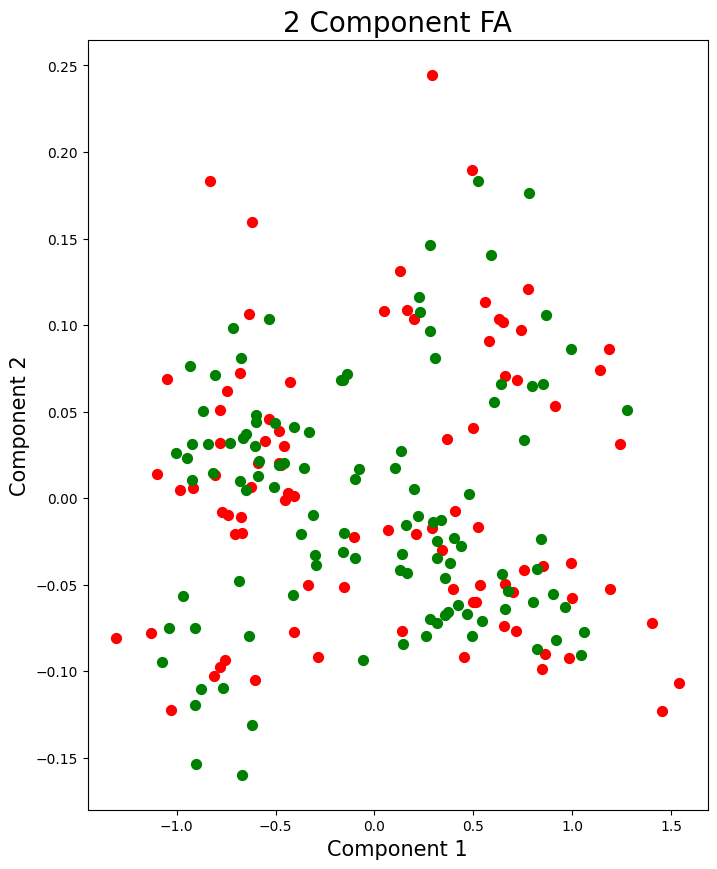

In [108]:
fig = plt.figure(figsize = (8,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 Component FA', fontsize = 20)
gender = ['Male', 'Female']
colors = ['r', 'g']
for gender, color in zip(gender,colors):
    indicesToKeep= que_x_FA['gender'] == gender
    ax.scatter(que_x_FA.loc[indicesToKeep, 'PC1']
               , que_x_FA.loc[indicesToKeep, 'PC2']
               , c = color, s = 50)
plt.show()


6. Сравнить результат и описать разницу в методах.

### Судя по дисперсиям можно сказать, что на данной задаче лучше сработал метод PCA, чем факторный, так как во втором значения дисперсий < 0:

* Объясненные дисперсии каждой компоненты в PCA: [0.49430654 0.26690895] 
* Значения для доли объясненной дисперсии в Factor Analysis: [-0.0026043  -0.00135925 -0.00253894]